## SQL Data Project 
GitHub: @guzmanwolfrank 

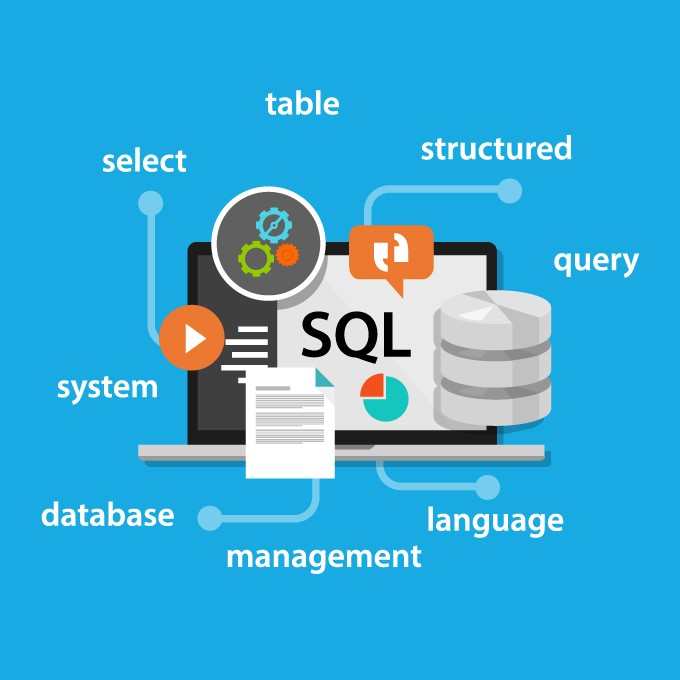

In this project we will run SQL queries on a database to resolve questions about a backtest and its results. 


In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the CSV File
csv_file = r'C:\Users\Wolfrank\Desktop\sdf.csv'  # Use a raw string for the file path
df = pd.read_csv(csv_file)

# Step 2: Create a SQLite Database
conn = sqlite3.connect('trades.db')  # Replace with your desired database name

# Step 3: Write the DataFrame to the Database
table_name = 'trades_table'  # Replace with your desired table name
df.to_sql(table_name, conn, if_exists='replace', index=False)


In [ ]:

# SQL queries

# 1. Retrieve all rows from the trades_table
query = f"SELECT * FROM {table_name}"
df_all_trades = pd.read_sql_query(query, conn)


In [2]:

# 2. Calculate the average profit per trade. 
query = f"SELECT AVG(Strat_Profits) AS average_profits FROM {table_name}"
average_profits = pd.read_sql_query(query, conn)['average_profits'].iloc[0].round(2)

# Display
print("The average  of profits is:", average_profits)

The average  of profits is: 953.47


In [3]:

# 3. Find trades with a profit (Change > 0)
query = f"SELECT * FROM {table_name} WHERE Change > 0"
df_profitable_trades = pd.read_sql_query(query, conn)

print('The trades with a profit are ', df_profitable_trades)

The trades with a profit are      Tradeno        Date  Shares Symbol   Open   High    Low  Close     Volume  \
0         4  2020-07-09    1000   TQQQ  28.85  29.17  27.47  28.92  158798000   
1        11  2020-07-20    1000   TQQQ  28.20  30.56  27.77  30.34  125810800   
2        20  2020-07-31    1000   TQQQ  29.83  29.88  28.22  29.84  179907600   
3        60  2020-09-28    1000   TQQQ  32.32  32.50  31.39  32.43  136665600   
4        87  2020-11-04    1000   TQQQ  33.90  35.66  33.33  35.02  169187600   
5       115  2020-12-15    1000   TQQQ  42.15  42.50  41.23  42.47   78708800   
6       131  2021-01-08    1000   TQQQ  46.83  47.72  45.85  47.57   76407600   
7       138  2021-01-20    1000   TQQQ  47.93  49.94  47.76  49.49   60868000   
8       147  2021-02-02    1000   TQQQ  49.94  51.48  49.88  50.91   46373200   
9       173  2021-03-11    1000   TQQQ  44.51  46.13  44.07  45.39   79467800   
10      187  2021-03-31    1000   TQQQ  44.40  46.30  44.26  45.63   80984400  

In [4]:

# 4. Calculate the total volume for each symbol
query = f"SELECT Symbol, SUM(Volume) AS total_volume FROM {table_name} GROUP BY Symbol"
df_total_volume = pd.read_sql_query(query, conn)
display(df_total_volume)

,Symbol,total_volume
0,TQQQ,6561909100


In [5]:

# 5. Find trades with a loss (Change < 0)
query = f"SELECT * FROM {table_name} WHERE Change < 0"
df_loss_trades = pd.read_sql_query(query, conn)
display(df_loss_trades)

,Tradeno,Date,Shares,Symbol,Open,High,Low,Close,Volume,Range,...,Win,Loss,Strat_Drawdown,bhDrawdown,bhreturn,bhreturnpct,strategy_return,stratreturnpct,Strat_Daily_Return,Excess_Return
0,8,2020-07-15,1000,TQQQ,28.72,29.06,27.35,28.44,183772000,1.71,...,0,-280,46930,56450,0.053333,5.333333,-0.007778,-0.777778,-0.010344,-0.010621
1,29,2020-08-13,1000,TQQQ,32.02,32.79,31.63,31.98,117140800,1.16,...,0,-40,44820,52910,0.184444,18.444444,0.070370,7.037037,-0.001382,-0.001660
2,181,2021-03-23,1000,TQQQ,46.03,46.62,44.58,44.95,93890400,2.04,...,0,-1080,40200,39940,0.664815,66.481481,0.241481,24.148148,-0.031214,-0.031492
3,320,2021-10-08,1000,TQQQ,65.33,65.46,63.49,63.74,78566000,1.97,...,0,-1590,29560,21150,1.360741,136.074074,0.635556,63.555556,-0.034754,-0.035032
4,346,2021-11-15,1000,TQQQ,83.46,83.65,81.04,82.70,69729200,2.61,...,0,-760,28760,2190,2.062963,206.296296,0.665185,66.518519,-0.016623,-0.016901
5,578,2022-10-18,1000,TQQQ,20.87,21.00,19.17,19.78,346276900,1.83,...,0,-1090,8940,65110,-0.267407,-26.740741,1.399259,139.925926,-0.016548,-0.016826
6,618,2022-12-14,1000,TQQQ,22.21,22.99,21.08,21.80,289455500,1.91,...,0,-410,5340,63090,-0.192593,-19.259259,1.532593,153.259259,-0.005960,-0.006238
7,634,2023-01-09,1000,TQQQ,18.08,18.96,17.89,18.01,186021400,1.07,...,0,-70,5410,66880,-0.332963,-33.296296,1.530000,153.000000,-0.001024,-0.001301


In [6]:
# 6. Find the maximum value in the 'close' column
SQL = "SELECT MAX(close) FROM trades_table"

# Execute the query and fetch the result
max_close = conn.execute(SQL).fetchone()[0]

# Close the database connection
#conn.close()

# Print the result
print(f"The maximum value in the 'close' column is: {max_close}")

The maximum value in the 'close' column is: 84.89


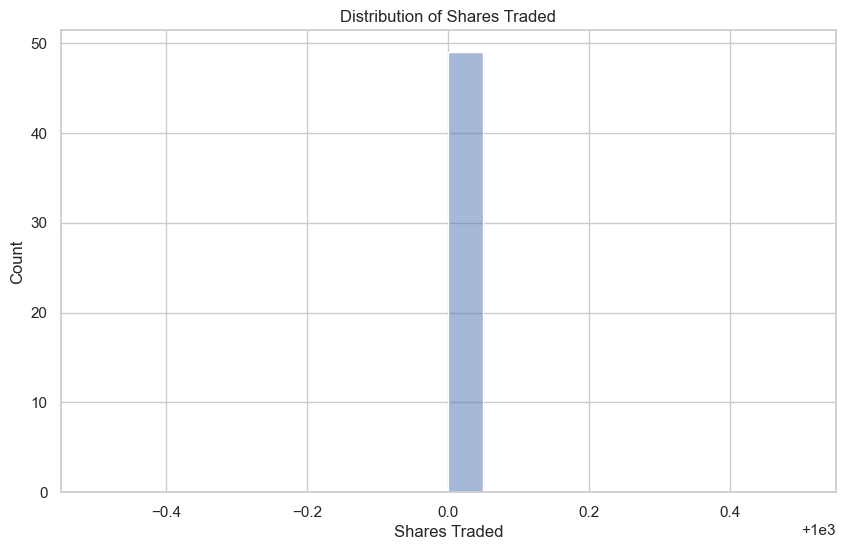

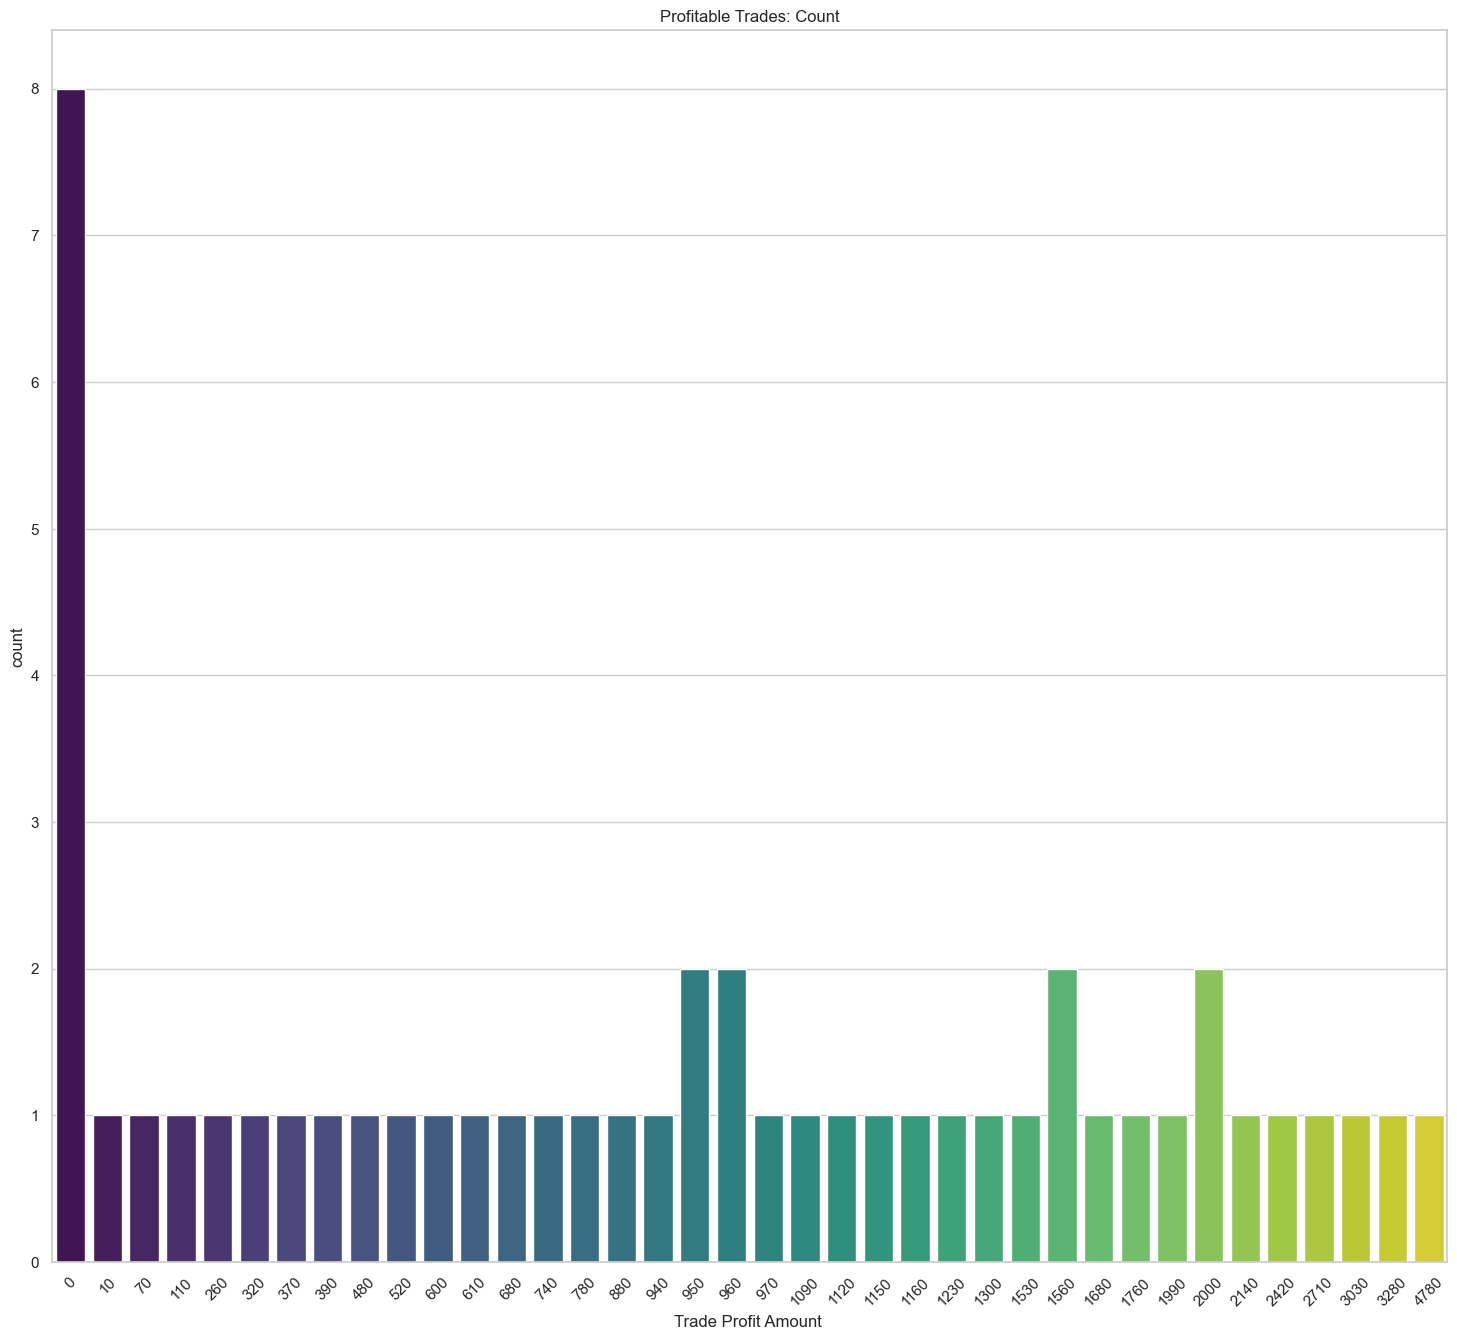

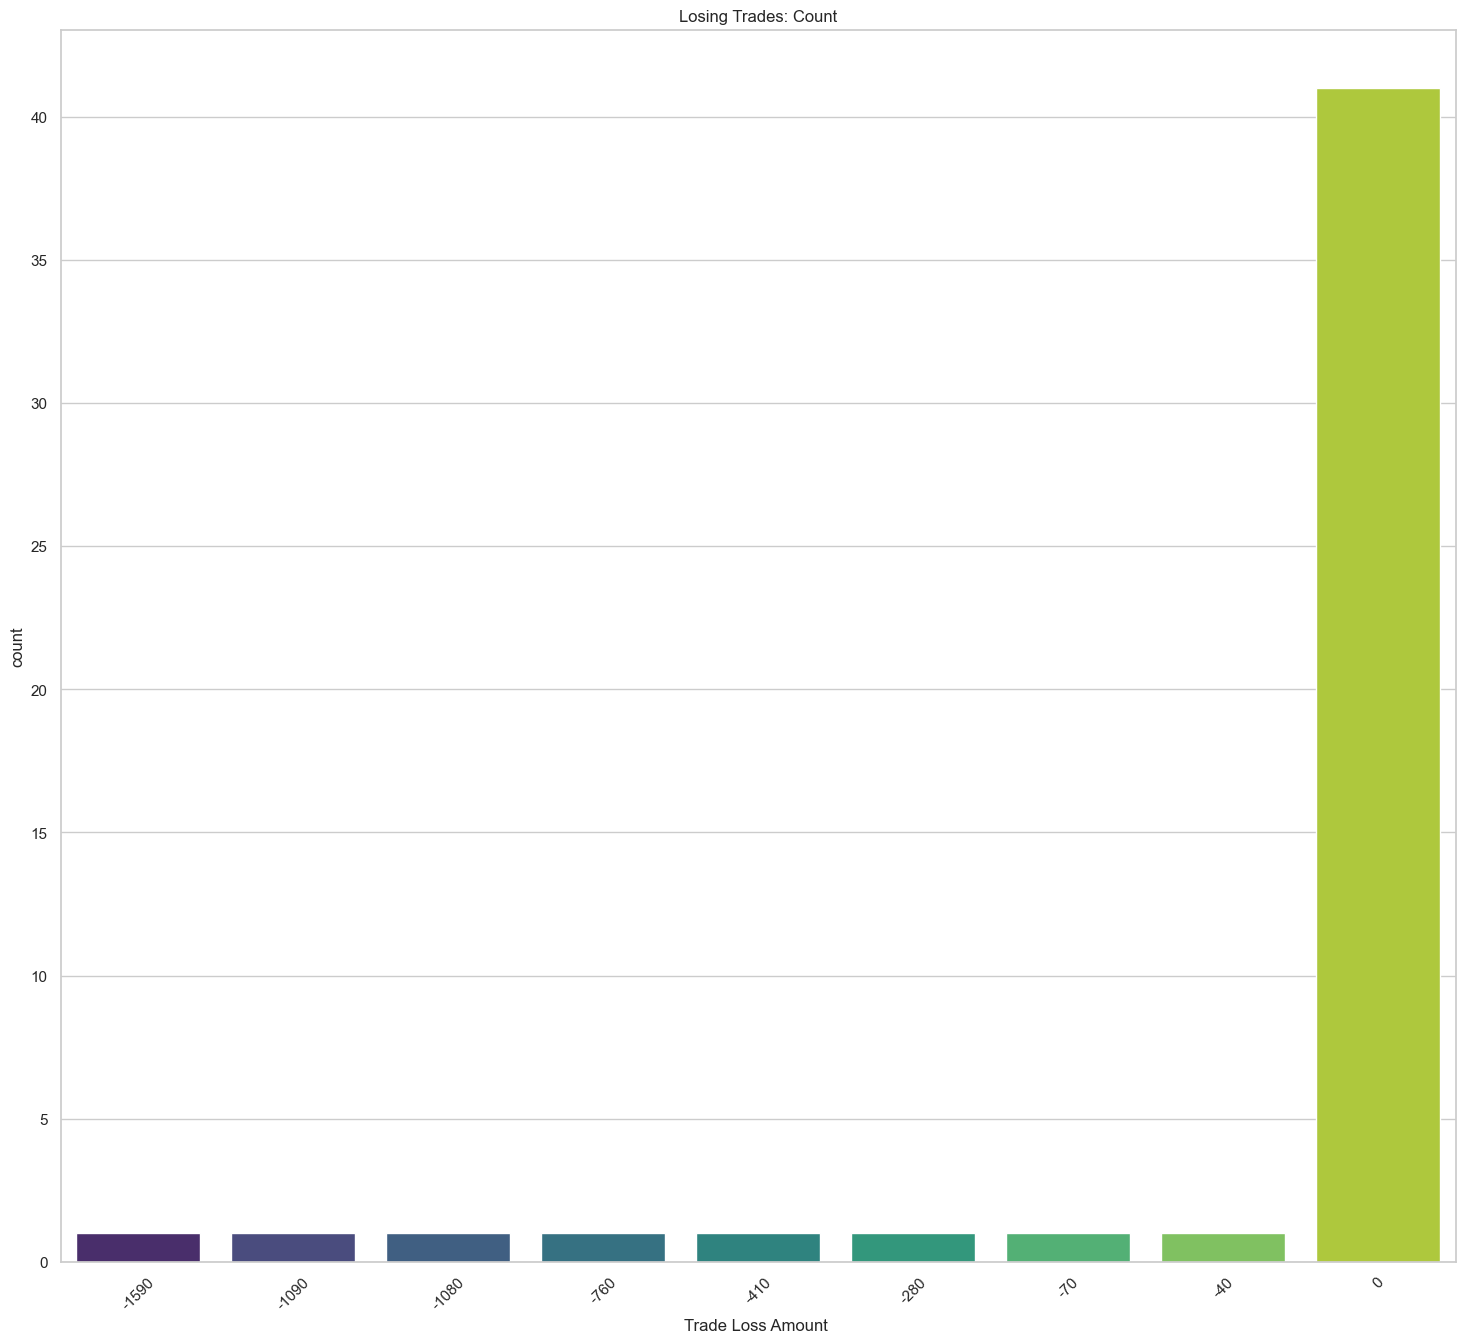

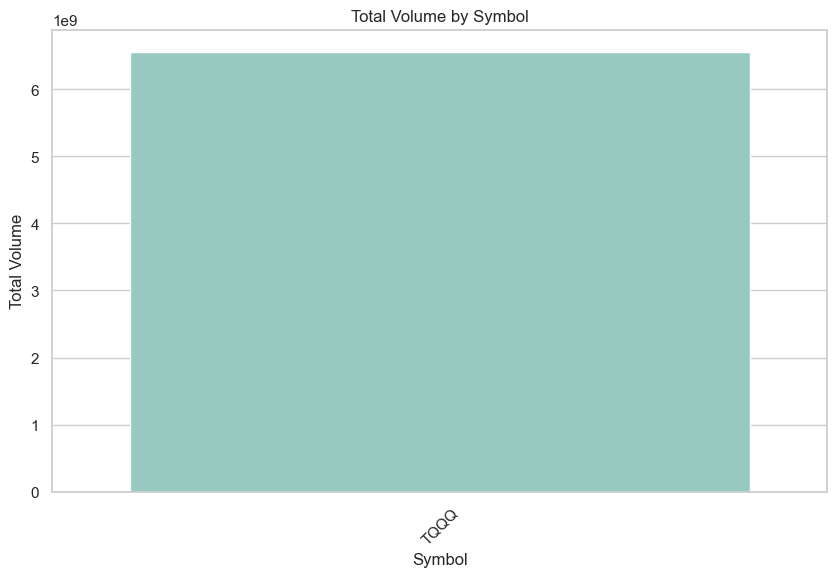

c:\Users\Wolfrank\Desktop\CodeWolf\inprogress\.data\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


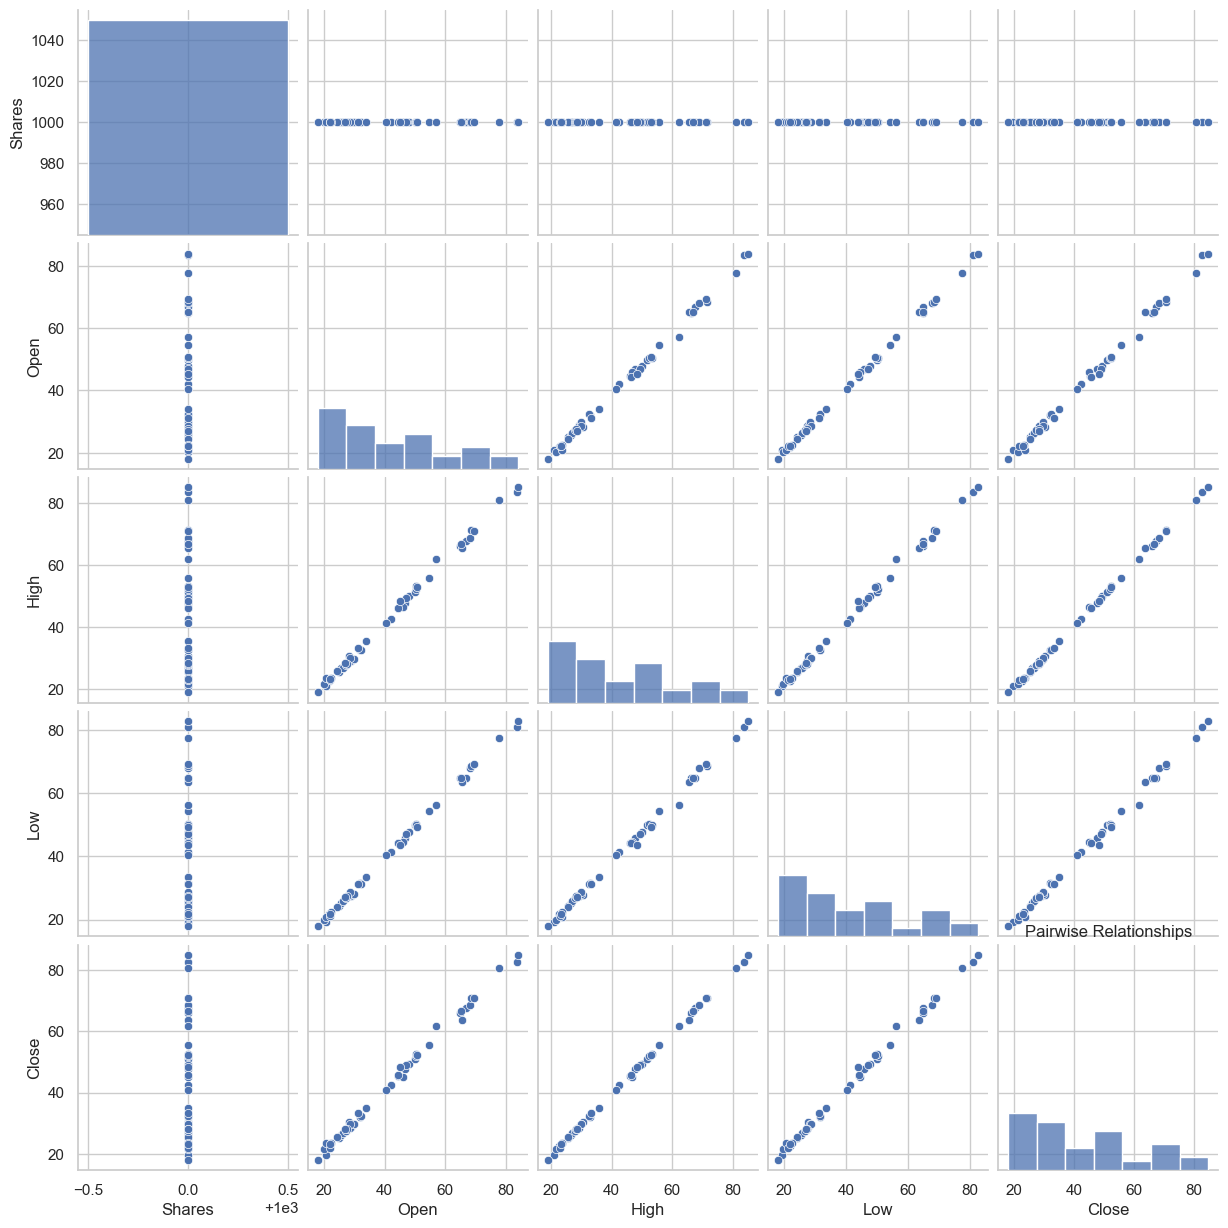

c:\Users\Wolfrank\Desktop\CodeWolf\inprogress\.data\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


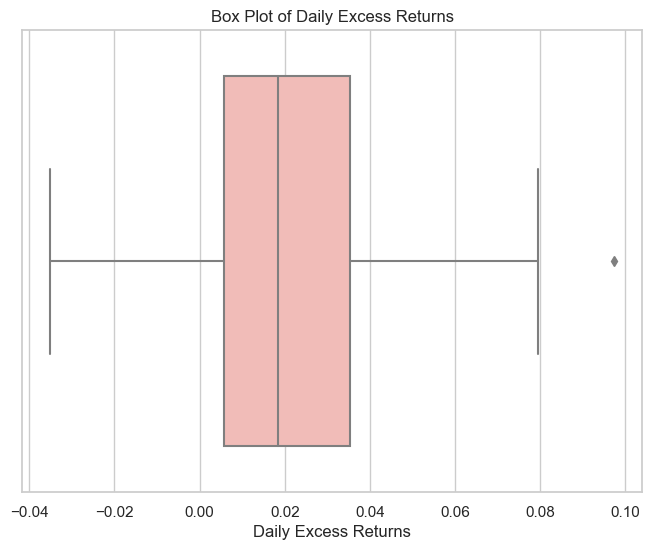

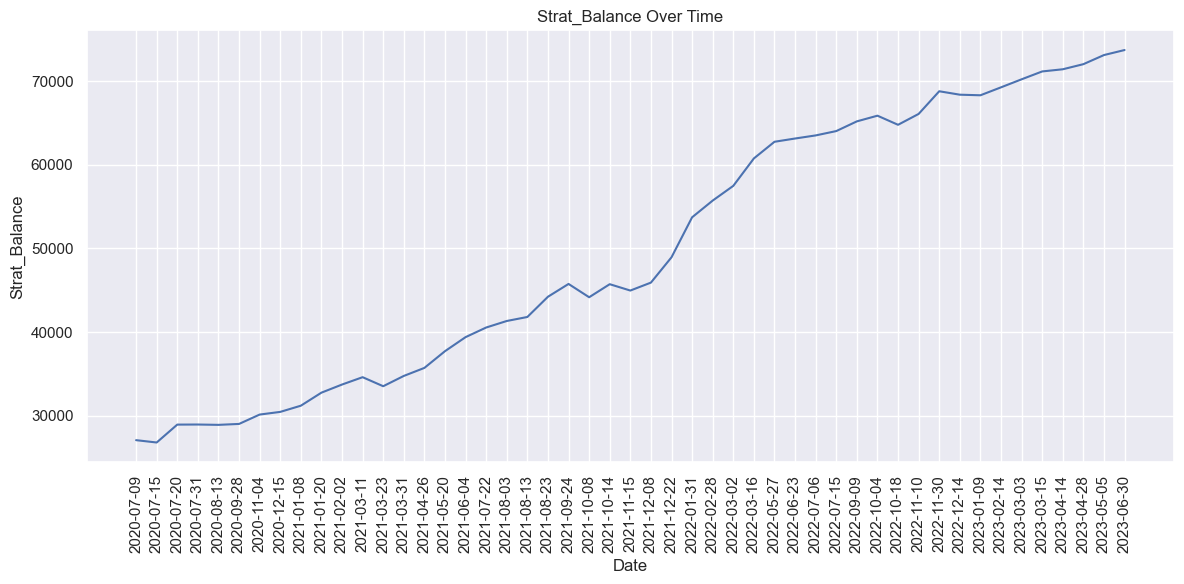

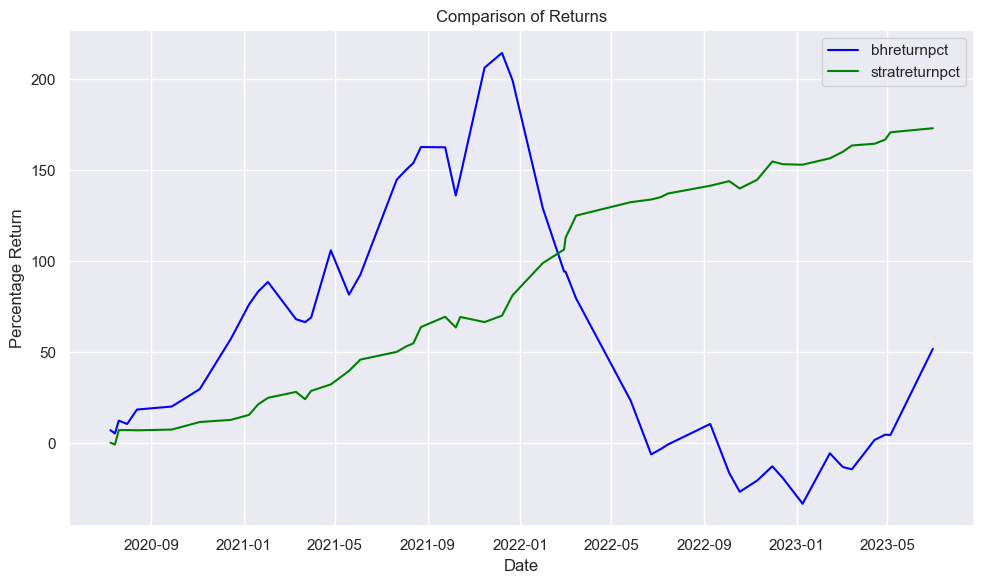

Sample Trades Data:
    Tradeno        Date  Shares Symbol   Open   High    Low  Close     Volume  \
0         4  2020-07-09    1000   TQQQ  28.85  29.17  27.47  28.92  158798000   
1         8  2020-07-15    1000   TQQQ  28.72  29.06  27.35  28.44  183772000   
2        11  2020-07-20    1000   TQQQ  28.20  30.56  27.77  30.34  125810800   
3        20  2020-07-31    1000   TQQQ  29.83  29.88  28.22  29.84  179907600   
4        29  2020-08-13    1000   TQQQ  32.02  32.79  31.63  31.98  117140800   
5        60  2020-09-28    1000   TQQQ  32.32  32.50  31.39  32.43  136665600   
6        87  2020-11-04    1000   TQQQ  33.90  35.66  33.33  35.02  169187600   
7       115  2020-12-15    1000   TQQQ  42.15  42.50  41.23  42.47   78708800   
8       131  2021-01-08    1000   TQQQ  46.83  47.72  45.85  47.57   76407600   
9       138  2021-01-20    1000   TQQQ  47.93  49.94  47.76  49.49   60868000   
10      147  2021-02-02    1000   TQQQ  49.94  51.48  49.88  50.91   46373200   
11      

In [7]:

# Data Visualization using Seaborn

# 1. Distribution of Shares Traded
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_all_trades['Shares'], bins=20, kde=True)
plt.xlabel('Shares Traded')
plt.title('Distribution of Shares Traded')
plt.show()

# 2. Profitable vs. Loss Trades (Count)
plt.figure(figsize=(18, 16))
sns.countplot(x='Win', data=df_all_trades, palette='viridis')
plt.xlabel('Trade Profit Amount ')
plt.title('Profitable Trades: Count')
plt.xticks(rotation=45)
plt.show()



# 2a. Profitable vs. Loss Trades (Count)
plt.figure(figsize=(18, 16))
sns.countplot(x='Loss', data=df_all_trades, palette='viridis')
plt.xlabel('Trade Loss Amount ')
plt.title('Losing Trades: Count')
plt.xticks(rotation=45)
plt.show()


# 3. Total Volume by Symbol (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='Symbol', y='total_volume', data=df_total_volume, palette='Set3')
plt.xlabel('Symbol')
plt.ylabel('Total Volume')
plt.title('Total Volume by Symbol')
plt.xticks(rotation=45)
plt.show()

# 4. Pairwise Relationships (Scatter Plot)
sns.pairplot(df_all_trades[['Shares', 'Open', 'High', 'Low', 'Close']])
plt.title('Pairwise Relationships')
plt.show()

# 5. Box Plot of Daily Excess Returns
plt.figure(figsize=(8, 6))
sns.boxplot(x='Excess_Return', data=df_all_trades, orient='vertical', palette='Pastel1')
plt.xlabel('Daily Excess Returns')
plt.title('Box Plot of Daily Excess Returns')
plt.show()

# 6. Line Graph of Strategy Balance over time
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(data=df, x='Date', y='Strat_Balance')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Strat_Balance')
plt.title('Strat_Balance Over Time')
# Show the plot
plt.tight_layout() 
plt.show()

# 7. Line Graph comparing results of buy and hold and strategy
df['Date'] = pd.to_datetime(df['Date'])
x = df['Date']
y1 = df['bhreturnpct']
y2 = df['stratreturnpct']
# Create the line chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(x, y1, label='bhreturnpct', color='blue',)
plt.plot(x, y2, label='stratreturnpct', color='green',)
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.title('Comparison of Returns')
plt.grid(True)
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()  # Optional: Ensures that labels are not cut off
plt.show()




# Displaying the results
print("Sample Trades Data:")
print(df_all_trades)

print("\nProfitable Trades:")
print(df_profitable_trades)

print("\nTotal Volume by Symbol:")
print(df_total_volume)

print("\nLoss Trades:")
print(df_loss_trades)

# Step 4: Close the Database Connection
conn.close()